# SALARY DATA DATASET
Using the above dataset to evaluate the different linear regression model to predict the Salary. 

## BUSINESS OBJECTIVE
* Maximize effieciency
* Minimize churn
* Maximize employee retainability. 

## CONSTRAINTS
* Location .
* Better Salary opportunities. 
* Work Culture. 

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | YearsExperience    | The Years of experience of the employee                     | Ratio    | Relevant      |
| 2        | Salary | The salary of the employee based on the years of experience.  | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass21\Salary_Data.csv")
df=df0.copy()
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(30, 2)

In [4]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 YearsExperience    0
Salary             0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 YearsExperience    28
Salary             30
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [11]:
df.median()

YearsExperience        4.7
Salary             65237.0
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_35800\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)


ModeResult(mode=array([[3.2000e+00, 3.7731e+04]]), count=array([[2, 1]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [14]:
df.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_35800\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

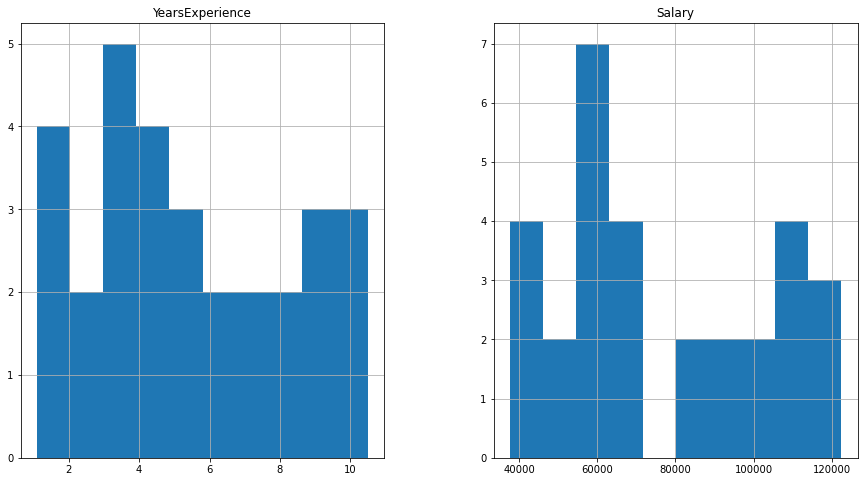

In [17]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


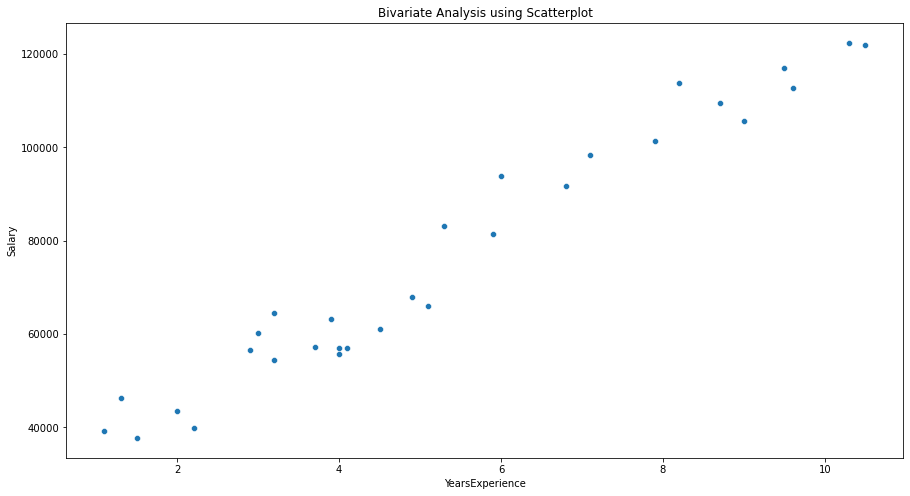

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['YearsExperience'],df['Salary'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [19]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

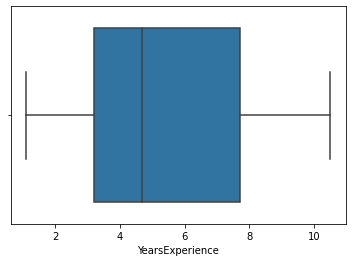

In [20]:
sns.boxplot(df['YearsExperience'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

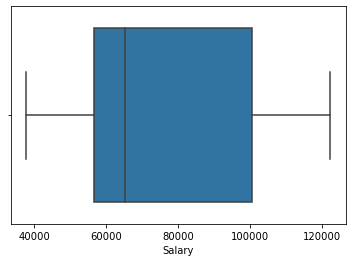

In [21]:
sns.boxplot(df['Salary'])

from the boxplots it is evident that there are no outliers in both the variables. 

__CORRELATION CHART__

<AxesSubplot:>

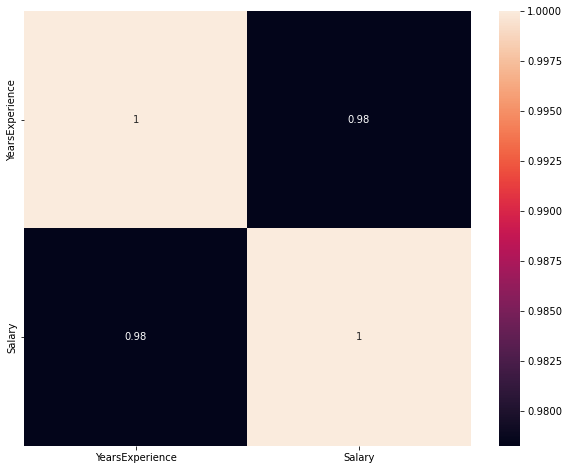

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that the YearsExperience has a very strong positive correlation with Salary.

In [23]:
cov_output = np.cov(df['YearsExperience'], df['Salary'])[0, 1]
cov_output

76106.30344827585

A positive covariance indicates that the two variables tend to move together and with the same sign, a negative covariance indicates that the two variables tend to move in the opposite direction.<br>
__From the covariance value we can infer that the variables move in the same direction.__

### EVALUATING DIFFERENT  MODELS FOR  MODEL BUILDING

Importing the library required for evaluating the models. 

In [24]:
import statsmodels.formula.api as smf

__Simple Linear Regression__

Fitting the model

In [25]:
model1 = smf.ols("df['Salary'] ~ df['YearsExperience']", data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           df['Salary']   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        10:55:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
df['YearsExperience']  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization to see how well the model fit the data.

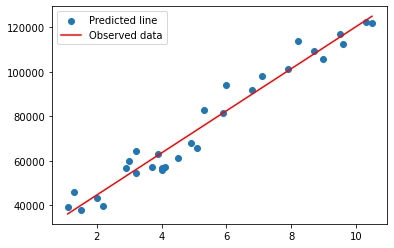

In [26]:
pred1 = model1.predict(pd.DataFrame(df['YearsExperience']))

# Regression Line
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(df['YearsExperience'], pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error Calculation

In [27]:
res1 = df['Salary'] - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

5592.043608760662

__Model building on Transformed Data__<br>
* __Log Transformation__

Plotting the scatter plot to understand the correlation and regression line between the transformed variables. 

array([[1.        , 0.92406108],
       [0.92406108, 1.        ]])

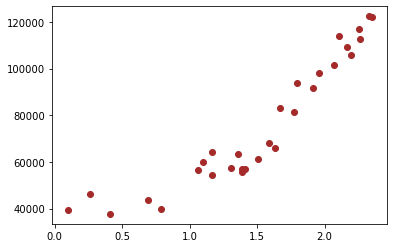

In [28]:
plt.scatter(x = np.log(df['YearsExperience']), y = df['Salary'], color = 'brown')
np.corrcoef(np.log(df['YearsExperience']), df['Salary']) #correlation

Fitting the model on the regression line

In [29]:
model2 = smf.ols("df['Salary'] ~ np.log(df['YearsExperience'])", data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           df['Salary']   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           3.25e-13
Time:                        10:55:41   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(df['YearsExperience'])  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Visualization to see how well the model fit the data. 

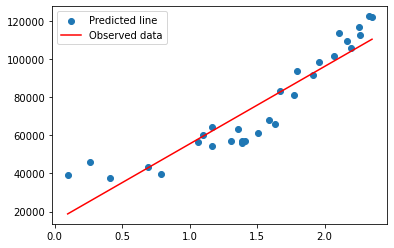

In [30]:
pred2 = model2.predict(pd.DataFrame(df['YearsExperience']))

# Regression Line
plt.scatter(np.log(df['YearsExperience']), df['Salary'])
plt.plot(np.log(df['YearsExperience']), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [31]:
res2 = df['Salary'] - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

10302.893706228304

* __Exponential transformation__

Plotting the scatter plot to understand the correlation between the transformed variables.

array([[1.        , 0.96538444],
       [0.96538444, 1.        ]])

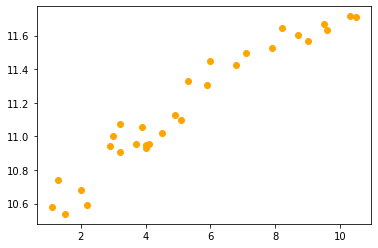

In [32]:
plt.scatter(x = df['YearsExperience'], y = np.log(df['Salary']), color = 'orange')
np.corrcoef(df['YearsExperience'], np.log(df['Salary'])) #correlation

Fitting the model on the regression line

In [33]:
model3 = smf.ols("np.log(df['Salary']) ~ df['YearsExperience']", data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(df['Salary'])   R-squared:                       0.932
Model:                              OLS   Adj. R-squared:                  0.930
Method:                   Least Squares   F-statistic:                     383.6
Date:                  Sat, 05 Nov 2022   Prob (F-statistic):           7.03e-18
Time:                          10:56:04   Log-Likelihood:                 28.183
No. Observations:                    30   AIC:                            -52.37
Df Residuals:                        28   BIC:                            -49.56
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.5074      0.038    273.327      0.000      10.429      10.586
df['YearsExperience']     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
pred3 = model3.predict(pd.DataFrame(df['YearsExperience']))
pred3_at = np.exp(pred3)

Visualization to see how well the model fit the data.

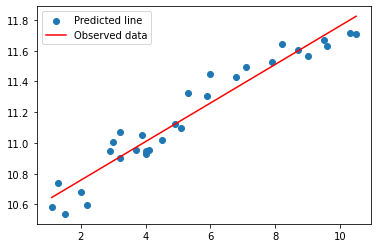

In [35]:
# Regression Line
plt.scatter(df['YearsExperience'], np.log(df['Salary']))
plt.plot(df['YearsExperience'], pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [36]:
res3 = df['Salary'] - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

7213.235076620233

* __Polynomial transformation__

Fitting the model on the regression line

In [37]:
model4 = smf.ols("np.log(df['Salary']) ~ df['YearsExperience'] + I(df['YearsExperience']*df['YearsExperience'])", data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(df['Salary'])   R-squared:                       0.949
Model:                              OLS   Adj. R-squared:                  0.945
Method:                   Least Squares   F-statistic:                     249.2
Date:                  Sat, 05 Nov 2022   Prob (F-statistic):           3.95e-18
Time:                          10:56:15   Log-Likelihood:                 32.391
No. Observations:                    30   AIC:                            -58.78
Df Residuals:                        27   BIC:                            -54.58
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           10.3369      0.067    154.368      0.000      10.199      10.474
df['YearsExperience']                                0.2024      0.027      7.601      0.000       0.148       0.257
I(df['YearsExperience'] * df['YearsExperience'])    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
pred4 = model4.predict(pd.DataFrame(df))
pred4_at = np.exp(pred4)

Visualization to see how well the model fit the data.

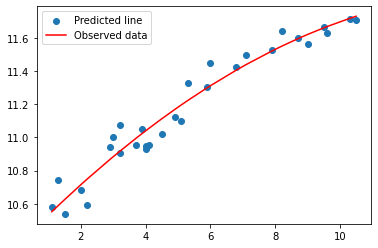

In [39]:
# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = df.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(df['YearsExperience'], np.log(df['Salary']))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error calculation

In [40]:
res4 = df['Salary']- pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

5391.081582693625

__Log Transformation on both the variables__

Plotting the scatter plot to understand the correlation between the transformed variables.

array([[1.        , 0.95142791],
       [0.95142791, 1.        ]])

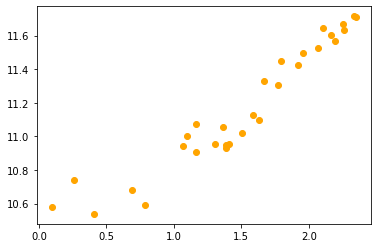

In [41]:
plt.scatter(x = np.log(df['YearsExperience']), y = np.log(df['Salary']), color = 'orange')
np.corrcoef(np.log(df['YearsExperience']), np.log(df['Salary'])) #correlation

Fitting the model

In [42]:
model5 = smf.ols("np.log(df['Salary']) ~ np.log(df['YearsExperience'])", data = df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(df['Salary'])   R-squared:                       0.905
Model:                              OLS   Adj. R-squared:                  0.902
Method:                   Least Squares   F-statistic:                     267.4
Date:                  Sat, 05 Nov 2022   Prob (F-statistic):           7.40e-16
Time:                          10:56:41   Log-Likelihood:                 23.209
No. Observations:                    30   AIC:                            -42.42
Df Residuals:                        28   BIC:                            -39.61
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        10.3280      0.056    184.868      0.000      10.214      10.442
np.log(df['YearsExperience'])     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
pred5 = model5.predict(pd.DataFrame(df['YearsExperience']))
pred5_at = np.exp(pred5)

Visualization to see how well the model fit the data.

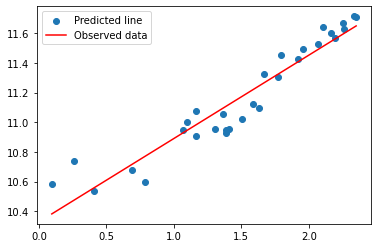

In [44]:
# Regression Line
plt.scatter(np.log(df['YearsExperience']), np.log(df['Salary']))
plt.plot(np.log(df['YearsExperience']), pred5, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

Error Calculation

In [45]:
res5 = df['Salary'] - pred5_at
res_sqr5 = res5 * res5
mse5 = np.mean(res_sqr5)
rmse5 = np.sqrt(mse5)
rmse5

7219.716974372786

                   ** COMPARING THE IMPORTANT VALUES FOR ALL THE DIFFERENT MODELS TO SELECT THE BEST MODEL **

|               **OUTPUT**               |               **INPUT**              | **R VALUE** | **R^2 VALUE** | **RMSE VALUE** |
|:--------------------------------------:|:------------------------------------:|:------------|:-------------:|:--------------:|
|Salary                           |YearsExperience                        | 0.98        | 0.957         | 5592.04         |
|Salary                          |log(YearsExperience)                   | 0.92       | 0.854        | 10302.89         |
|log(Salary)                      |YearsExperience                       | 0.965      | 0.932        | 7213.23       |
|log(Salary)                      |YearsExperience,YearsExperience^2         |             | 0.949         | 5391.08    |
|log(Salary)                      |log(YearsExperience)                   |  0.951         | 0.905       | 7219.72      |

#### CONCLUSION
From all the different models both simple linear regression and polynomial model have the best values among all the models.<br>
__So from the above information the simple linear regression model is the best model as it is also simple to implement.__